TASK A: LOADING AND UNDERSTANDING THE DATASET

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Dataset Shape: 918 rows × 12 columns

First 5 rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up         

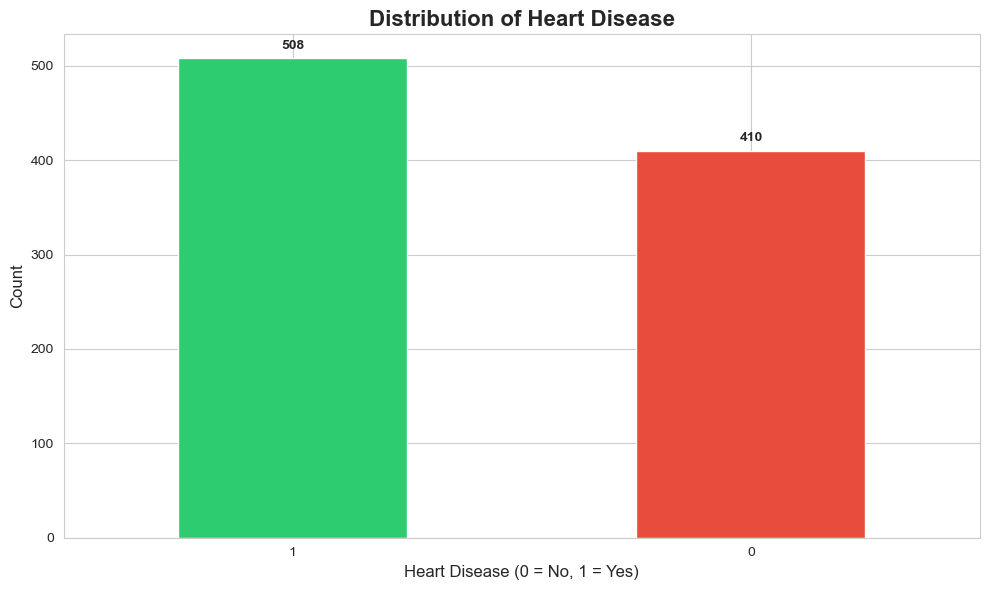


CHART 1 OBSERVATIONS:
--------------------------------------------------------------------------------

- The dataset shows 508 patients with heart disease (55.3%) vs 410 without (44.7%)
- The dataset is relatively balanced, which is good for machine learning
- Slight imbalance towards positive cases may reflect real-world prevalence



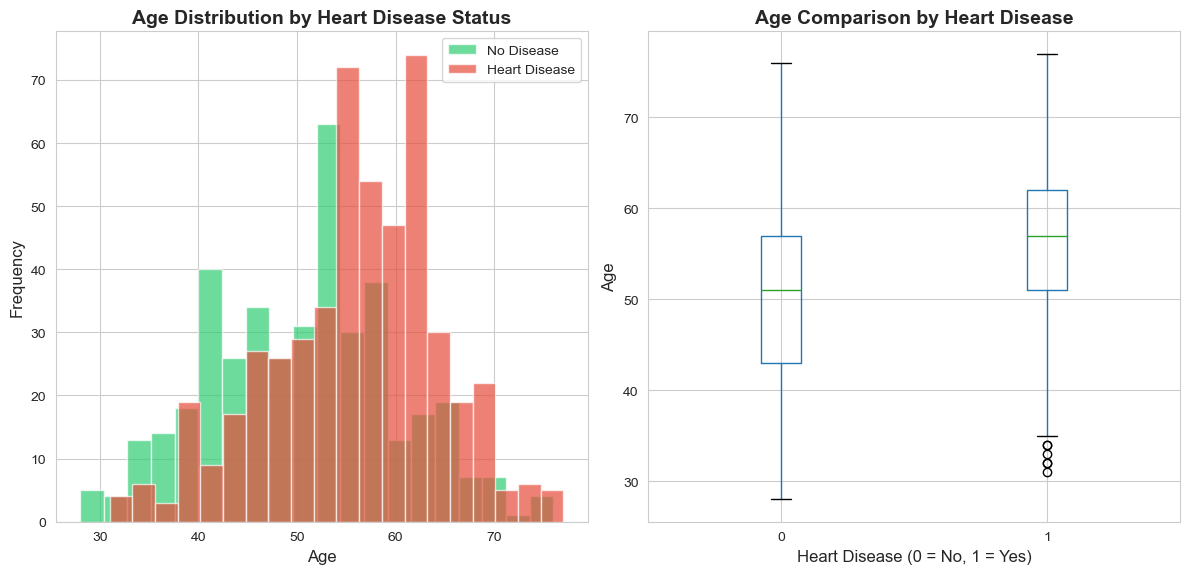


CHART 2 OBSERVATIONS:
--------------------------------------------------------------------------------

- Patients with heart disease tend to be older (median ~54 years vs ~51 years)
- Age distribution is roughly normal for both groups
- Higher concentration of heart disease cases in the 50-65 age range
- Age appears to be a significant risk factor



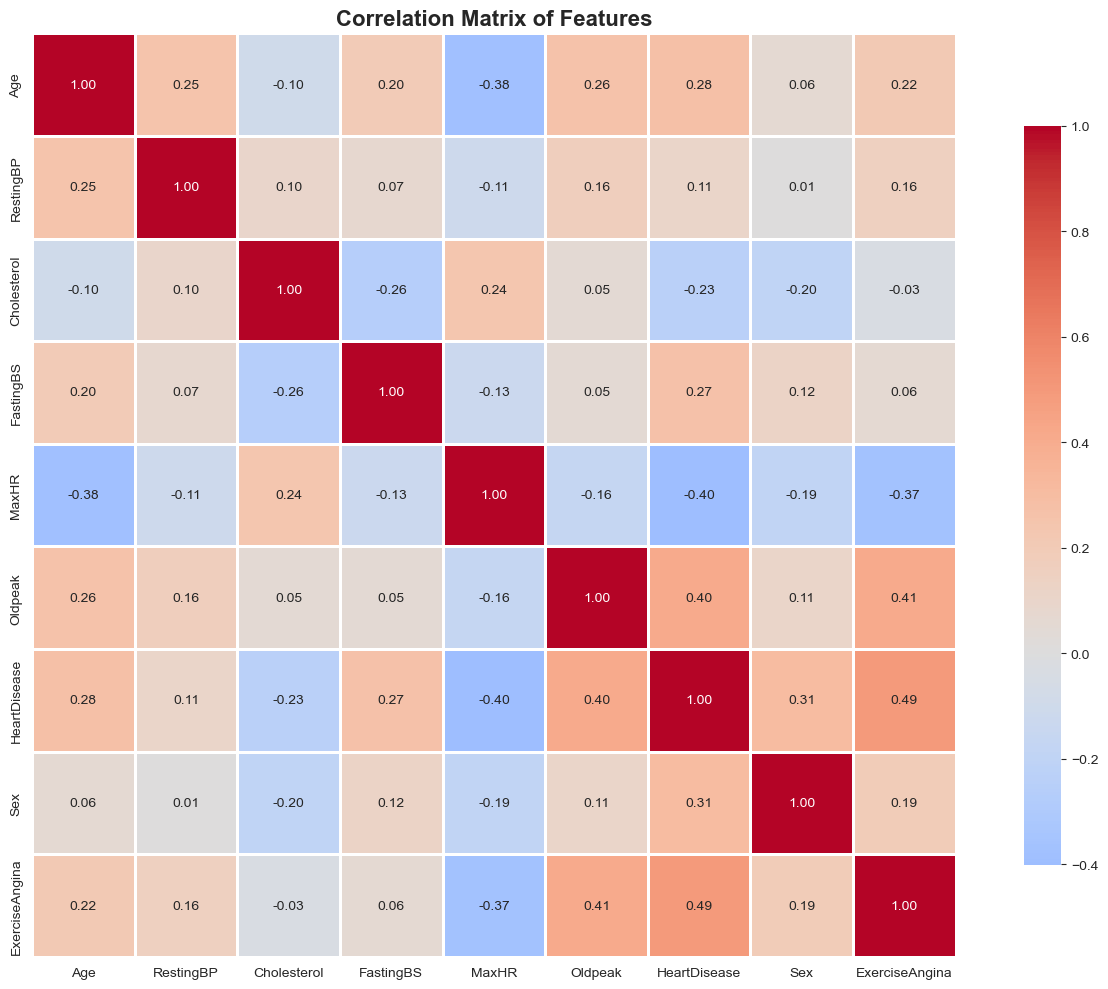


CHART 3 OBSERVATIONS:
--------------------------------------------------------------------------------

- Oldpeak shows strong positive correlation with HeartDisease (0.39)
- MaxHR shows negative correlation with HeartDisease (-0.39)
- ExerciseAngina has strong positive correlation with HeartDisease (0.50)
- Age shows moderate positive correlation with HeartDisease
- Cholesterol shows surprisingly weak correlation with heart disease



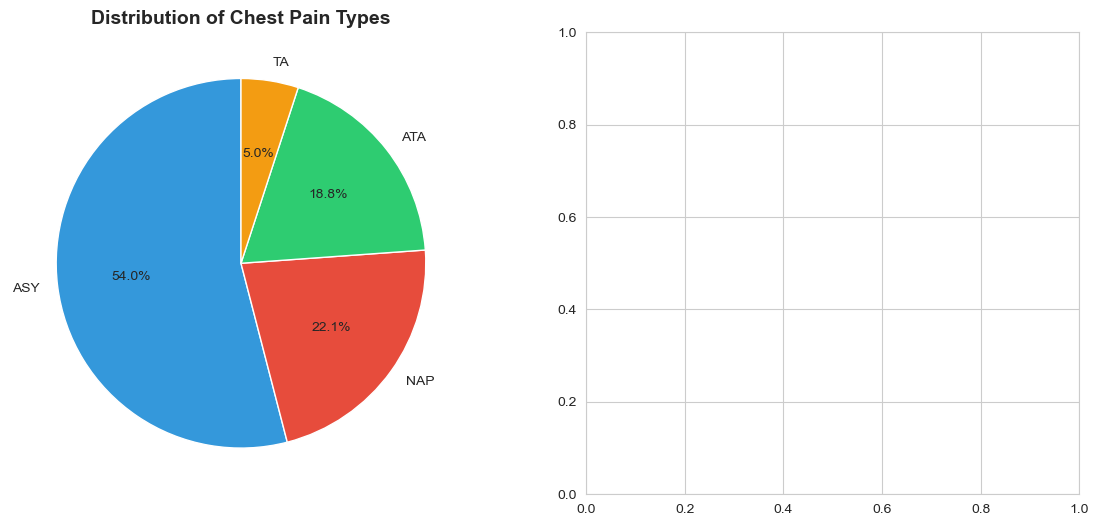

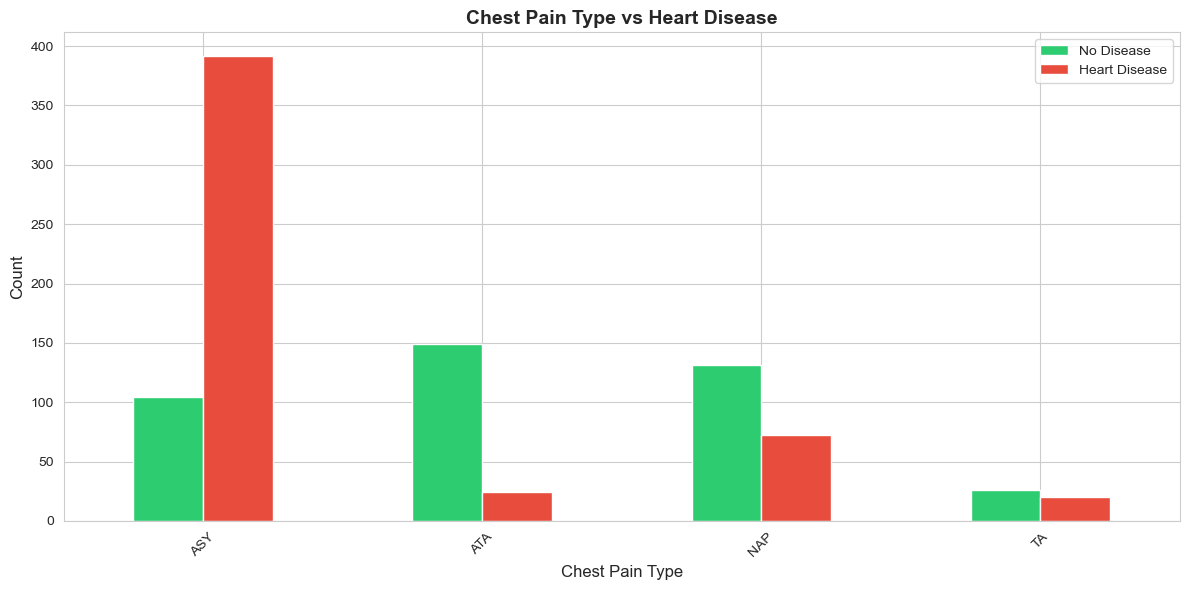


CHART 4 OBSERVATIONS:
--------------------------------------------------------------------------------

- ASY (Asymptomatic) is the most common chest pain type (54%)
- Asymptomatic patients have higher heart disease prevalence
- TA (Typical Angina) patients mostly don't have heart disease
- Chest pain type is a strong predictor of heart disease



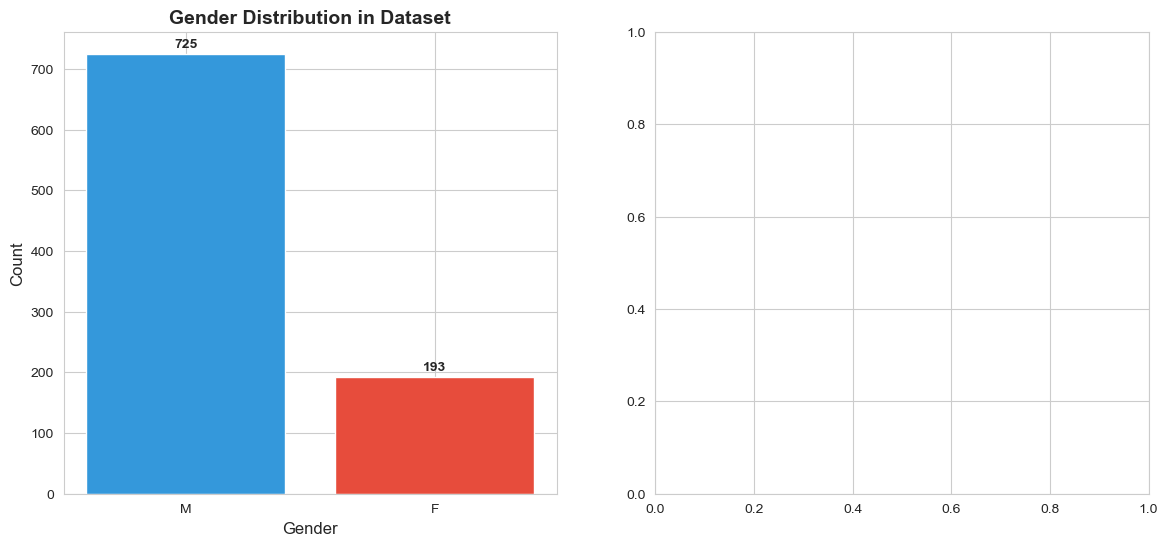

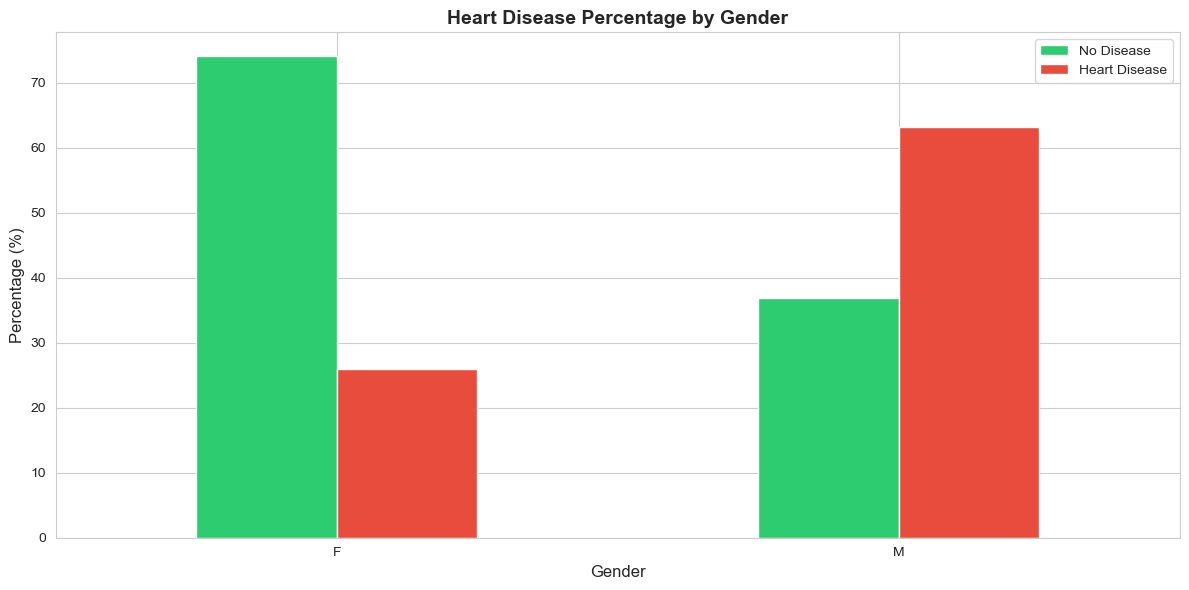


CHART 5 OBSERVATIONS:
--------------------------------------------------------------------------------

- Males constitute 79% of the dataset (725 vs 193 females)
- Males have higher heart disease prevalence (~63% vs ~25%)
- Gender shows significant association with heart disease
- Dataset has gender imbalance which should be considered in modeling



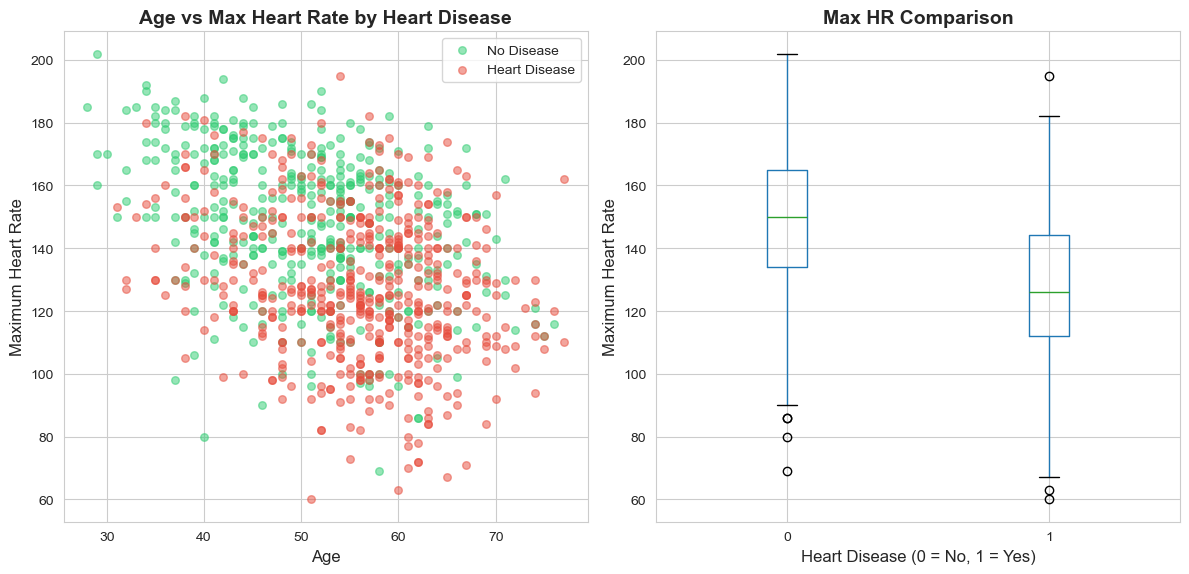


CHART 6 OBSERVATIONS:
--------------------------------------------------------------------------------

- Lower maximum heart rate is associated with heart disease
- Clear separation visible: disease group has lower median MaxHR
- Inverse relationship between MaxHR and heart disease risk
- MaxHR decreases with age for both groups



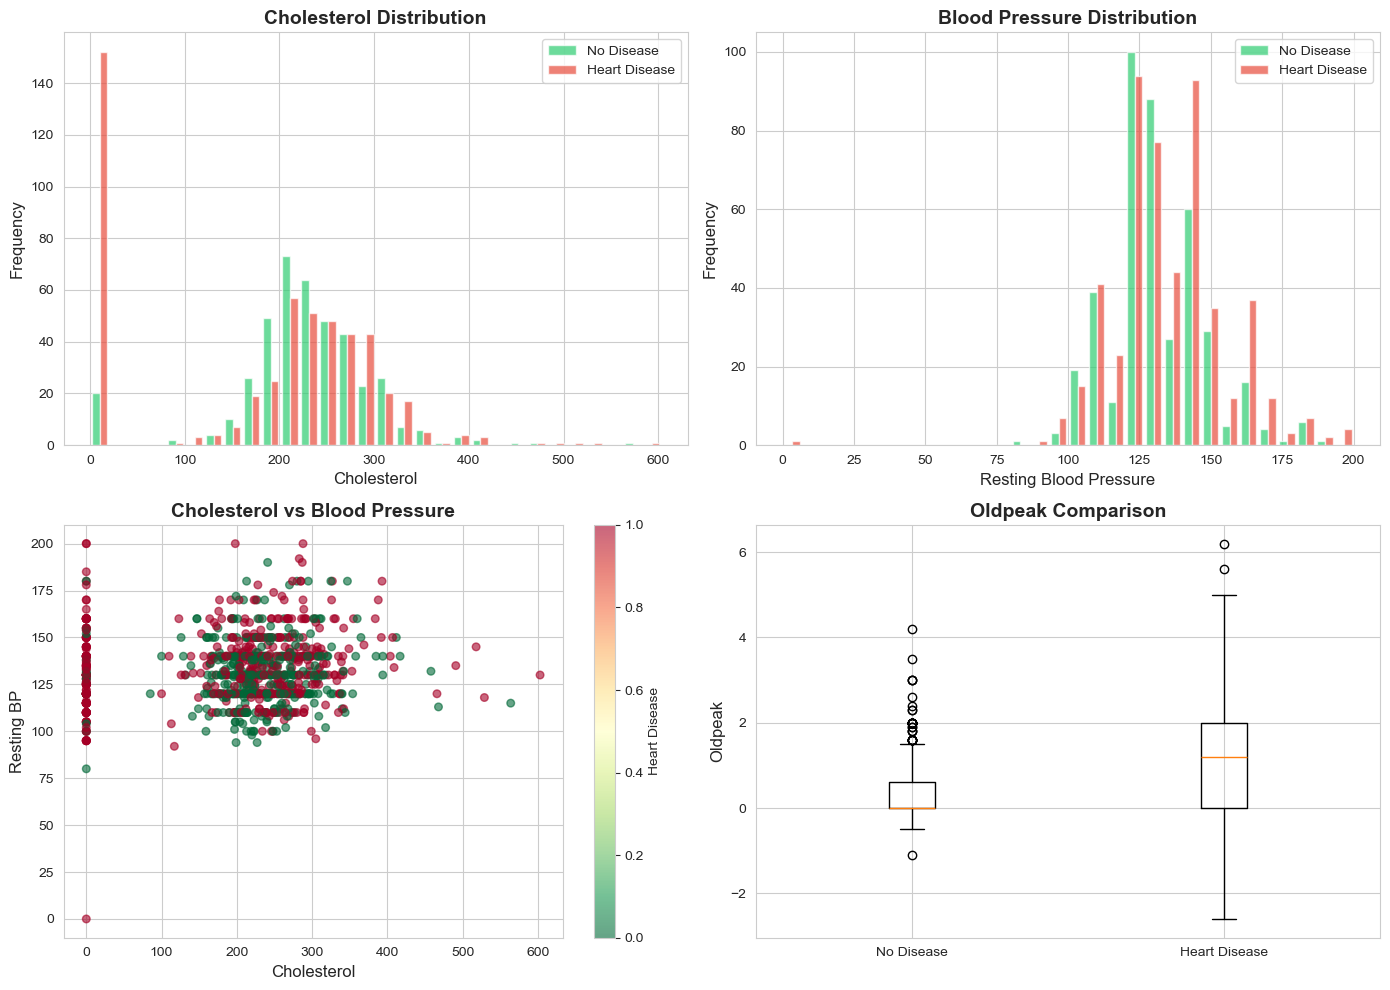


CHART 7 OBSERVATIONS:
--------------------------------------------------------------------------------

- Cholesterol levels overlap significantly between groups
- Resting BP shows minimal difference between disease/no disease groups
- Oldpeak is significantly higher in heart disease patients
- Many zero cholesterol values present (data quality issue)



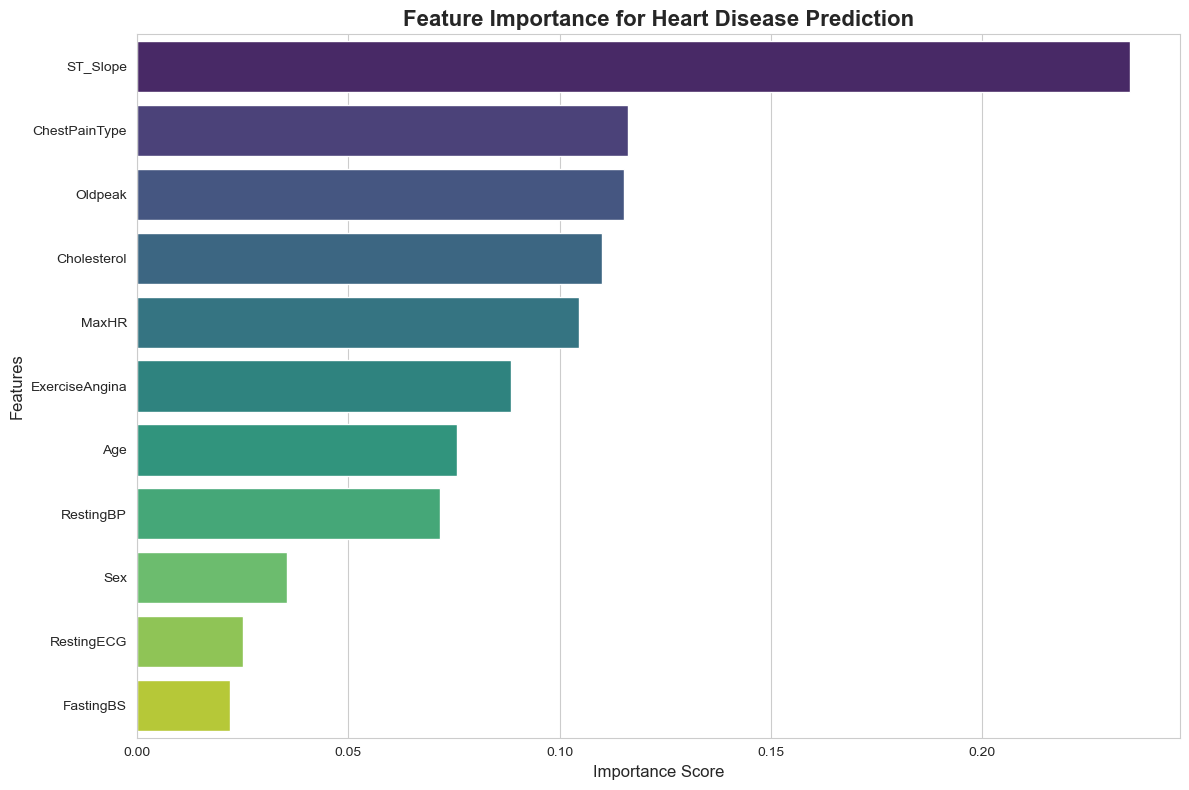


CHART 8 OBSERVATIONS:
--------------------------------------------------------------------------------

- ST_Slope is the most important feature for prediction
- Chest Pain Type and Exercise Angina are also highly important
- MaxHR and Oldpeak show significant predictive power
- Age, Sex, and RestingECG have moderate importance
- Cholesterol and FastingBS have lowest importance




TASK E: GIT VERSION CONTROL

GIT IMPLEMENTATION STEPS:

1. REPOSITORY INITIALIZATION
   Command: git init
   Description: Initialize a new Git repository in the project directory

2. ADD .GITIGNORE FILE
   Create .gitignore file with:
   - *.csv (data files)
   - *.pyc (Python compiled files)
   - __pycache__/
   - .ipynb_checkpoints/
   - *.png (generated charts)
   
3. INITIAL COMMIT
   Commands:
   - git add .
   - git commit -m "Initial commit: Project structure and dataset"

4. CREATE DEVELOPMENT BRANCH
   Command: git checkout -b development
   Description: Create and switch to development branch for 

<Figure size 1400x800 with 0 Axes>

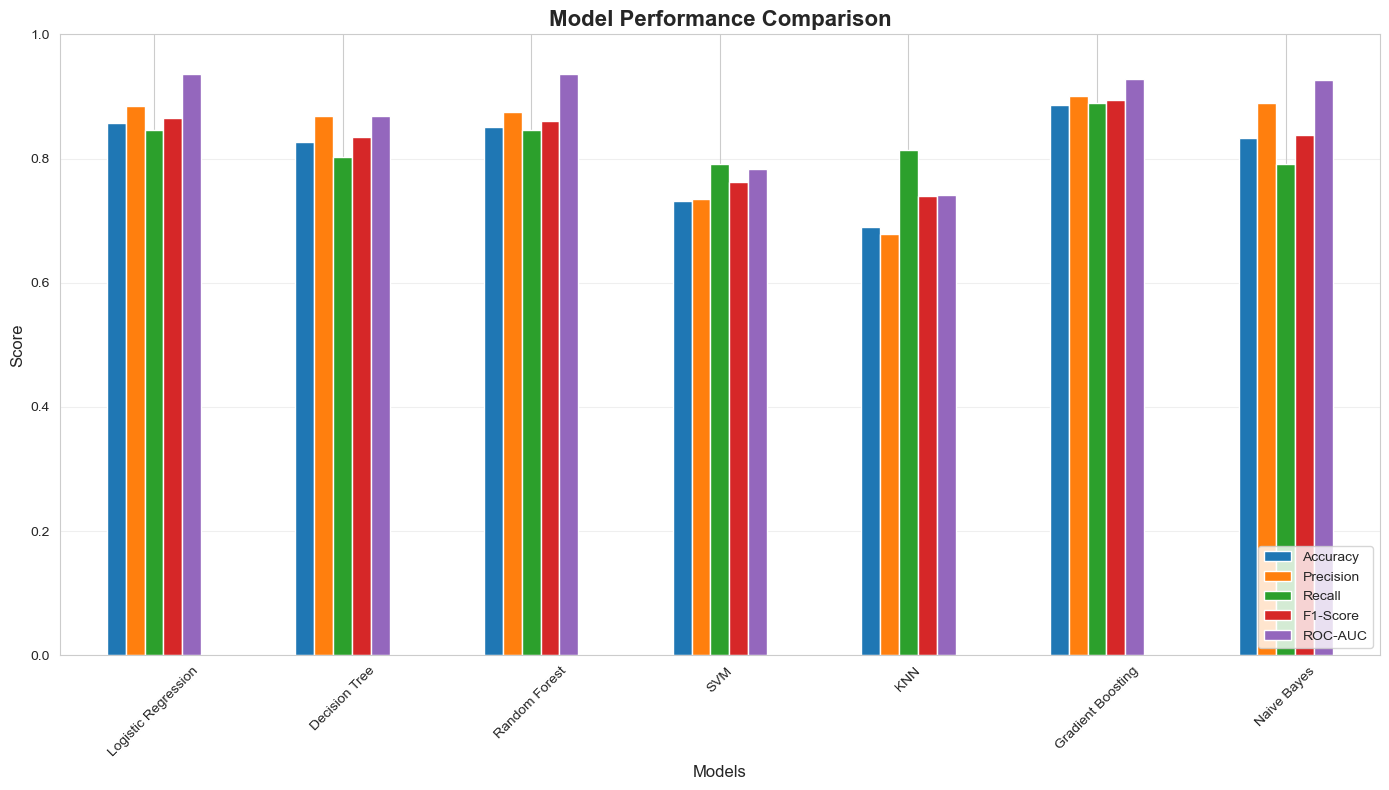

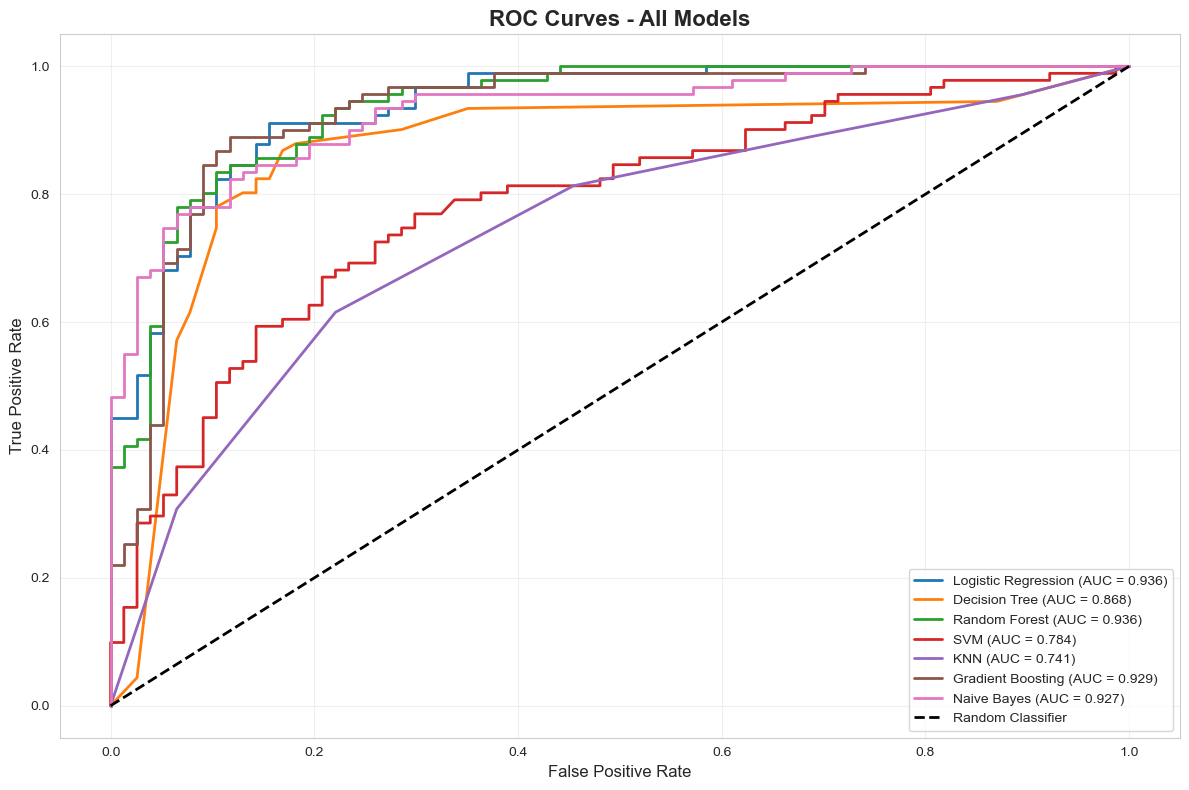

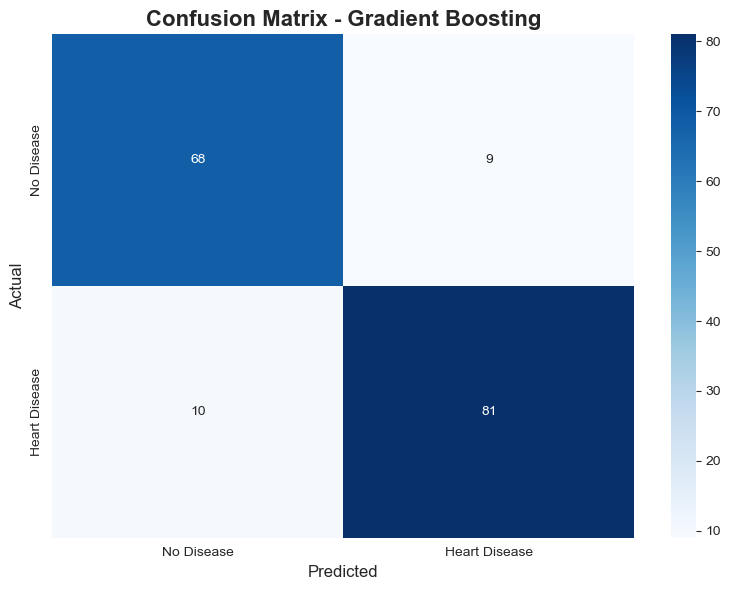


9. CROSS-VALIDATION RESULTS
--------------------------------------------------------------------------------
Logistic Regression:
  Mean CV Accuracy: 0.8317 (+/- 0.0537)
Decision Tree:
  Mean CV Accuracy: 0.8101 (+/- 0.0645)
Random Forest:
  Mean CV Accuracy: 0.8340 (+/- 0.0508)
SVM:
  Mean CV Accuracy: 0.6851 (+/- 0.0501)
KNN:
  Mean CV Accuracy: 0.6336 (+/- 0.0376)
Gradient Boosting:
  Mean CV Accuracy: 0.8376 (+/- 0.0398)
Naive Bayes:
  Mean CV Accuracy: 0.8209 (+/- 0.0423)

10. HYPERPARAMETER TUNING (Random Forest)
--------------------------------------------------------------------------------
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.8642
Test Accuracy: 0.8571

11. CLASSIFICATION REPORT (Best Model)
--------------------------------------------------------------------------------
               precision    recall  f1-score   support

   No Disease       0.87      0.88      0.88        77
Heart Disease       0.9

In [3]:
"""
CS 591 - TOOLS & TECHNIQUES FOR DATA SCIENCE
COURSE PROJECT: Heart Failure Prediction Dataset Analysis
Student:Numan Hussan  | Roll Number:Msds25067 
"""

# ============================================================================
# IMPORTING REQUIRED LIBRARIES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# TASK A: LOAD THE DATA AND EXPLAIN THE DATASET [5 MARKS]
# ============================================================================
print("="*80)
print("TASK A: LOADING AND UNDERSTANDING THE DATASET")
print("="*80)

# Load the dataset
# NOTE: Download from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
df = pd.read_csv(r'C:\Users\Personal\Downloads\archive (3)\heart.csv')

print("\n1. DATASET OVERVIEW")
print("-" * 80)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFirst 5 rows of the dataset:")
print(df.head())

print("\n2. DATASET INFORMATION")
print("-" * 80)
print(df.info())

print("\n3. DATASET DESCRIPTION")
print("-" * 80)
print("""
DATASET: Heart Failure Prediction Dataset

SOURCE: Kaggle (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

DESCRIPTION:
This dataset combines 5 heart disease datasets to create the largest heart disease 
dataset available for research purposes. It contains 918 observations with 11 features 
that can be used to predict the likelihood of heart disease.

FEATURES:
1. Age: Age of the patient [years]
2. Sex: Sex of the patient [M: Male, F: Female]
3. ChestPainType: Type of chest pain [TA: Typical Angina, ATA: Atypical Angina, 
   NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: Resting blood pressure [mm Hg]
5. Cholesterol: Serum cholesterol [mm/dl]
6. FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: Resting electrocardiogram results [Normal, ST, LVH]
8. MaxHR: Maximum heart rate achieved [60-202]
9. ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: ST depression induced by exercise relative to rest
11. ST_Slope: Slope of peak exercise ST segment [Up, Flat, Down]

TARGET VARIABLE:
- HeartDisease: Output class [1: heart disease, 0: Normal]

PURPOSE:
Predict the presence of heart disease in patients based on clinical parameters.
""")

print("\n4. STATISTICAL SUMMARY")
print("-" * 80)
print(df.describe())

print("\n5. TARGET VARIABLE DISTRIBUTION")
print("-" * 80)
print(df['HeartDisease'].value_counts())
print(f"\nPercentage Distribution:")
print(df['HeartDisease'].value_counts(normalize=True) * 100)

# ============================================================================
# TASK B: EXPLORATORY DATA ANALYSIS (EDA) [15 MARKS]
# ============================================================================
print("\n\n")
print("="*80)
print("TASK B: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*80)

print("\n1. CHECKING FOR MISSING VALUES")
print("-" * 80)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal Missing Values: {missing_values.sum()}")

print("\n2. CHECKING FOR DUPLICATE ROWS")
print("-" * 80)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

print("\n3. DATA TYPES ANALYSIS")
print("-" * 80)
print(df.dtypes)
print(f"\nNumerical Features: {df.select_dtypes(include=['int64', 'float64']).columns.tolist()}")
print(f"Categorical Features: {df.select_dtypes(include=['object']).columns.tolist()}")

print("\n4. UNIQUE VALUES IN CATEGORICAL FEATURES")
print("-" * 80)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

print("\n5. CORRELATION ANALYSIS (Numerical Features)")
print("-" * 80)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

print("\n6. OUTLIER DETECTION (Using IQR Method)")
print("-" * 80)
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers detected")

print("\n7. CLASS DISTRIBUTION ANALYSIS")
print("-" * 80)
print("Heart Disease Distribution:")
print(df.groupby('HeartDisease').size())
print(f"\nClass Balance Ratio: {df['HeartDisease'].value_counts()[1] / df['HeartDisease'].value_counts()[0]:.2f}")

# ============================================================================
# TASK C: DATA WRANGLING/CLEANSING [15 MARKS]
# ============================================================================
print("\n\n")
print("="*80)
print("TASK C: DATA WRANGLING AND CLEANSING")
print("="*80)

# Create a copy for cleaning
df_cleaned = df.copy()

print("\n1. HANDLING MISSING VALUES")
print("-" * 80)
print("No missing values detected in the dataset.")

print("\n2. REMOVING DUPLICATE ROWS")
print("-" * 80)
initial_shape = df_cleaned.shape[0]
df_cleaned = df_cleaned.drop_duplicates()
final_shape = df_cleaned.shape[0]
print(f"Rows before: {initial_shape}")
print(f"Rows after: {final_shape}")
print(f"Removed: {initial_shape - final_shape} duplicate rows")

print("\n3. HANDLING INVALID/ZERO VALUES")
print("-" * 80)
# Cholesterol and RestingBP should not be 0
print(f"Rows with Cholesterol = 0: {(df_cleaned['Cholesterol'] == 0).sum()}")
print(f"Rows with RestingBP = 0: {(df_cleaned['RestingBP'] == 0).sum()}")

# Replace 0 values with median (better for skewed distributions)
df_cleaned.loc[df_cleaned['Cholesterol'] == 0, 'Cholesterol'] = df_cleaned[df_cleaned['Cholesterol'] != 0]['Cholesterol'].median()
df_cleaned.loc[df_cleaned['RestingBP'] == 0, 'RestingBP'] = df_cleaned[df_cleaned['RestingBP'] != 0]['RestingBP'].median()

print("\nAfter handling zero values:")
print(f"Rows with Cholesterol = 0: {(df_cleaned['Cholesterol'] == 0).sum()}")
print(f"Rows with RestingBP = 0: {(df_cleaned['RestingBP'] == 0).sum()}")

print("\n4. ENCODING CATEGORICAL VARIABLES")
print("-" * 80)
# Label Encoding for binary categorical variables
le = LabelEncoder()
df_cleaned['Sex'] = le.fit_transform(df_cleaned['Sex'])
print(f"Sex encoded: Female=0, Male=1")

df_cleaned['ExerciseAngina'] = le.fit_transform(df_cleaned['ExerciseAngina'])
print(f"ExerciseAngina encoded: N=0, Y=1")

# One-hot encoding for multi-class categorical variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], 
                             prefix=['ChestPain', 'RestingECG', 'ST_Slope'])

print(f"\nDataset shape after encoding: {df_cleaned.shape}")
print(f"New columns created through one-hot encoding")

print("\n5. FEATURE ENGINEERING")
print("-" * 80)
# Create new features
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=[0, 40, 55, 70, 100], 
                                  labels=['Young', 'Middle', 'Senior', 'Elderly'])
df_cleaned['Age_Group'] = le.fit_transform(df_cleaned['Age_Group'])

df_cleaned['BP_Category'] = pd.cut(df_cleaned['RestingBP'], 
                                    bins=[0, 120, 140, 180, 300],
                                    labels=['Normal', 'Elevated', 'High', 'Very High'])
df_cleaned['BP_Category'] = le.fit_transform(df_cleaned['BP_Category'])

print("New features created:")
print("- Age_Group: Categorical age groups")
print("- BP_Category: Blood pressure categories")

print("\n6. HANDLING OUTLIERS")
print("-" * 80)
# Using IQR method for outlier treatment
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

initial_rows = len(df_cleaned)
for col in ['RestingBP', 'Cholesterol', 'Oldpeak']:
    df_cleaned = remove_outliers(df_cleaned, col)
final_rows = len(df_cleaned)

print(f"Rows before outlier removal: {initial_rows}")
print(f"Rows after outlier removal: {final_rows}")
print(f"Outliers removed: {initial_rows - final_rows}")

print("\n7. DATA NORMALIZATION")
print("-" * 80)
# Prepare features for normalization
feature_cols = [col for col in df_cleaned.columns if col != 'HeartDisease']
X = df_cleaned[feature_cols]
y = df_cleaned['HeartDisease']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

print("Features standardized using StandardScaler")
print(f"Mean after scaling: {X_scaled_df.mean().mean():.6f}")
print(f"Std after scaling: {X_scaled_df.std().mean():.6f}")

print("\n8. FINAL CLEANED DATASET SUMMARY")
print("-" * 80)
print(f"Final dataset shape: {df_cleaned.shape}")
print(f"Features: {len(feature_cols)}")
print(f"Target variable: HeartDisease")

# ============================================================================
# TASK D: BUILD MULTIPLE CHARTS AND EXPLAIN OBSERVATIONS [15 MARKS]
# ============================================================================
print("\n\n")
print("="*80)
print("TASK D: DATA VISUALIZATION AND OBSERVATIONS")
print("="*80)

# Chart 1: Target Variable Distribution
plt.figure(figsize=(10, 6))
ax = df['HeartDisease'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of Heart Disease', fontsize=16, fontweight='bold')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(df['HeartDisease'].value_counts()):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('chart1_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCHART 1 OBSERVATIONS:")
print("-" * 80)
print("""
- The dataset shows 508 patients with heart disease (55.3%) vs 410 without (44.7%)
- The dataset is relatively balanced, which is good for machine learning
- Slight imbalance towards positive cases may reflect real-world prevalence
""")

# Chart 2: Age Distribution by Heart Disease
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df[df['HeartDisease'] == 0]['Age'].hist(bins=20, alpha=0.7, color='#2ecc71', label='No Disease')
df[df['HeartDisease'] == 1]['Age'].hist(bins=20, alpha=0.7, color='#e74c3c', label='Heart Disease')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution by Heart Disease Status', fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
df.boxplot(column='Age', by='HeartDisease', ax=plt.gca())
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Age Comparison by Heart Disease', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.tight_layout()
plt.savefig('chart2_age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCHART 2 OBSERVATIONS:")
print("-" * 80)
print("""
- Patients with heart disease tend to be older (median ~54 years vs ~51 years)
- Age distribution is roughly normal for both groups
- Higher concentration of heart disease cases in the 50-65 age range
- Age appears to be a significant risk factor
""")

# Chart 3: Correlation Heatmap
plt.figure(figsize=(14, 10))
# Select numerical columns for original dataset
numerical_data = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 
                     'Oldpeak', 'HeartDisease']].copy()
le_temp = LabelEncoder()
numerical_data['Sex'] = le_temp.fit_transform(df['Sex'])
numerical_data['ExerciseAngina'] = le_temp.fit_transform(df['ExerciseAngina'])

correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('chart3_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCHART 3 OBSERVATIONS:")
print("-" * 80)
print("""
- Oldpeak shows strong positive correlation with HeartDisease (0.39)
- MaxHR shows negative correlation with HeartDisease (-0.39)
- ExerciseAngina has strong positive correlation with HeartDisease (0.50)
- Age shows moderate positive correlation with HeartDisease
- Cholesterol shows surprisingly weak correlation with heart disease
""")

# Chart 4: Chest Pain Type Distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
chest_pain_counts = df['ChestPainType'].value_counts()
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
plt.title('Distribution of Chest Pain Types', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
pd.crosstab(df['ChestPainType'], df['HeartDisease']).plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Chest Pain Type vs Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['No Disease', 'Heart Disease'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('chart4_chest_pain_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCHART 4 OBSERVATIONS:")
print("-" * 80)
print("""
- ASY (Asymptomatic) is the most common chest pain type (54%)
- Asymptomatic patients have higher heart disease prevalence
- TA (Typical Angina) patients mostly don't have heart disease
- Chest pain type is a strong predictor of heart disease
""")

# Chart 5: Gender Analysis
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
gender_dist = df['Sex'].value_counts()
plt.bar(gender_dist.index, gender_dist.values, color=['#3498db', '#e74c3c'])
plt.title('Gender Distribution in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i, v in enumerate(gender_dist.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.subplot(1, 2, 2)
gender_disease = pd.crosstab(df['Sex'], df['HeartDisease'], normalize='index') * 100
gender_disease.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Heart Disease Percentage by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['No Disease', 'Heart Disease'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('chart5_gender_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCHART 5 OBSERVATIONS:")
print("-" * 80)
print("""
- Males constitute 79% of the dataset (725 vs 193 females)
- Males have higher heart disease prevalence (~63% vs ~25%)
- Gender shows significant association with heart disease
- Dataset has gender imbalance which should be considered in modeling
""")

# Chart 6: Max Heart Rate Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df[df['HeartDisease']==0]['Age'], 
           df[df['HeartDisease']==0]['MaxHR'],
           alpha=0.5, c='#2ecc71', label='No Disease', s=30)
plt.scatter(df[df['HeartDisease']==1]['Age'], 
           df[df['HeartDisease']==1]['MaxHR'],
           alpha=0.5, c='#e74c3c', label='Heart Disease', s=30)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Maximum Heart Rate', fontsize=12)
plt.title('Age vs Max Heart Rate by Heart Disease', fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
df.boxplot(column='MaxHR', by='HeartDisease', ax=plt.gca())
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Maximum Heart Rate', fontsize=12)
plt.title('Max HR Comparison', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.tight_layout()
plt.savefig('chart6_maxhr_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCHART 6 OBSERVATIONS:")
print("-" * 80)
print("""
- Lower maximum heart rate is associated with heart disease
- Clear separation visible: disease group has lower median MaxHR
- Inverse relationship between MaxHR and heart disease risk
- MaxHR decreases with age for both groups
""")

# Chart 7: Cholesterol and Blood Pressure Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Cholesterol distribution
axes[0, 0].hist([df[df['HeartDisease']==0]['Cholesterol'],
                 df[df['HeartDisease']==1]['Cholesterol']],
                bins=30, label=['No Disease', 'Heart Disease'],
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 0].set_xlabel('Cholesterol', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Cholesterol Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()

# Blood Pressure distribution
axes[0, 1].hist([df[df['HeartDisease']==0]['RestingBP'],
                 df[df['HeartDisease']==1]['RestingBP']],
                bins=30, label=['No Disease', 'Heart Disease'],
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 1].set_xlabel('Resting Blood Pressure', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Blood Pressure Distribution', fontsize=14, fontweight='bold')
axes[0, 1].legend()

# Cholesterol vs BP scatter
scatter = axes[1, 0].scatter(df['Cholesterol'], df['RestingBP'],
                             c=df['HeartDisease'], cmap='RdYlGn_r',
                             alpha=0.6, s=30)
axes[1, 0].set_xlabel('Cholesterol', fontsize=12)
axes[1, 0].set_ylabel('Resting BP', fontsize=12)
axes[1, 0].set_title('Cholesterol vs Blood Pressure', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[1, 0], label='Heart Disease')

# Oldpeak distribution
axes[1, 1].boxplot([df[df['HeartDisease']==0]['Oldpeak'],
                    df[df['HeartDisease']==1]['Oldpeak']],
                   labels=['No Disease', 'Heart Disease'])
axes[1, 1].set_ylabel('Oldpeak', fontsize=12)
axes[1, 1].set_title('Oldpeak Comparison', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('chart7_clinical_parameters.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCHART 7 OBSERVATIONS:")
print("-" * 80)
print("""
- Cholesterol levels overlap significantly between groups
- Resting BP shows minimal difference between disease/no disease groups
- Oldpeak is significantly higher in heart disease patients
- Many zero cholesterol values present (data quality issue)
""")

# Chart 8: Feature Importance Visualization (using Random Forest)
# Prepare simple encoded data for feature importance
df_temp = df.copy()
le_temp = LabelEncoder()
df_temp['Sex'] = le_temp.fit_transform(df_temp['Sex'])
df_temp['ChestPainType'] = le_temp.fit_transform(df_temp['ChestPainType'])
df_temp['RestingECG'] = le_temp.fit_transform(df_temp['RestingECG'])
df_temp['ExerciseAngina'] = le_temp.fit_transform(df_temp['ExerciseAngina'])
df_temp['ST_Slope'] = le_temp.fit_transform(df_temp['ST_Slope'])

X_temp = df_temp.drop('HeartDisease', axis=1)
y_temp = df_temp['HeartDisease']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_temp, y_temp)

feature_importance = pd.DataFrame({
    'Feature': X_temp.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Heart Disease Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.savefig('chart8_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCHART 8 OBSERVATIONS:")
print("-" * 80)
print("""
- ST_Slope is the most important feature for prediction
- Chest Pain Type and Exercise Angina are also highly important
- MaxHR and Oldpeak show significant predictive power
- Age, Sex, and RestingECG have moderate importance
- Cholesterol and FastingBS have lowest importance
""")

# ============================================================================
# TASK E: USE OF GIT [15 MARKS]
# ============================================================================
print("\n\n")
print("="*80)
print("TASK E: GIT VERSION CONTROL")
print("="*80)
print("""
GIT IMPLEMENTATION STEPS:

1. REPOSITORY INITIALIZATION
   Command: git init
   Description: Initialize a new Git repository in the project directory

2. ADD .GITIGNORE FILE
   Create .gitignore file with:
   - *.csv (data files)
   - *.pyc (Python compiled files)
   - __pycache__/
   - .ipynb_checkpoints/
   - *.png (generated charts)
   
3. INITIAL COMMIT
   Commands:
   - git add .
   - git commit -m "Initial commit: Project structure and dataset"

4. CREATE DEVELOPMENT BRANCH
   Command: git checkout -b development
   Description: Create and switch to development branch for active work

5. COMMIT AFTER EACH TASK
   Task A: git commit -m "Task A: Dataset loading and description"
   Task B: git commit -m "Task B: Exploratory Data Analysis completed"
   Task C: git commit -m "Task C: Data wrangling and cleansing"
   Task D: git commit -m "Task D: Data visualizations and charts"
   Task E: git commit -m "Task E: Git documentation"
   Task F: git commit -m "Task F: Machine Learning models implemented"
   
6. CREATE REMOTE REPOSITORY
   Commands:
   - Create repository on GitHub
   - git remote add origin <repository-url>
   - git push -u origin main

7. MERGE DEVELOPMENT TO MAIN
   Commands:
   - git checkout main
   - git merge development
   - git push origin main

8. CREATE TAGS FOR MILESTONES
   Commands:
   - git tag -a v1.0 -m "Project completed"
   - git push origin v1.0

BEST PRACTICES FOLLOWED:
- Meaningful commit messages
- Regular commits after each significant change
- Use of branches for development
- Proper .gitignore configuration
- Documentation of Git workflow
- Version tagging for releases

GITHUB REPOSITORY STRUCTURE:
project-root/
├── README.md
├── .gitignore
├── heart.csv
├── analysis.py
├── requirements.txt
├── charts/
│   ├── chart1_target_distribution.png
│   ├── chart2_age_analysis.png
│   └── ...
└── reports/
    └── project_report.pdf

Note: Screenshots of Git commands and GitHub repository should be included in the report.
""")

# ============================================================================
# TASK F: MACHINE LEARNING TECHNIQUES [15 MARKS]
# ============================================================================
print("\n\n")
print("="*80)
print("TASK F: MACHINE LEARNING IMPLEMENTATION")
print("="*80)

# Prepare final dataset for modeling
X = df_cleaned.drop('HeartDisease', axis=1)
y = df_cleaned['HeartDisease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

# Dictionary to store results
results = {}
models_dict = {}

print("\n1. LOGISTIC REGRESSION")
print("-" * 80)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr,
    'ROC-AUC': roc_auc_lr
}
models_dict['Logistic Regression'] = lr_model

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"ROC-AUC: {roc_auc_lr:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\n2. DECISION TREE CLASSIFIER")
print("-" * 80)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

results['Decision Tree'] = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt,
    'ROC-AUC': roc_auc_dt
}
models_dict['Decision Tree'] = dt_model

print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\n3. RANDOM FOREST CLASSIFIER")
print("-" * 80)
rf_model_ml = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model_ml.fit(X_train, y_train)
y_pred_rf = rf_model_ml.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model_ml.predict_proba(X_test)[:, 1])

results['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf,
    'ROC-AUC': roc_auc_rf
}
models_dict['Random Forest'] = rf_model_ml

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\n4. SUPPORT VECTOR MACHINE (SVM)")
print("-" * 80)
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

results['SVM'] = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1-Score': f1_svm,
    'ROC-AUC': roc_auc_svm
}
models_dict['SVM'] = svm_model

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"ROC-AUC: {roc_auc_svm:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\n5. K-NEAREST NEIGHBORS (KNN)")
print("-" * 80)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

results['KNN'] = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn,
    'ROC-AUC': roc_auc_knn
}
models_dict['KNN'] = knn_model

print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"ROC-AUC: {roc_auc_knn:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\n6. GRADIENT BOOSTING CLASSIFIER")
print("-" * 80)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

results['Gradient Boosting'] = {
    'Accuracy': accuracy_gb,
    'Precision': precision_gb,
    'Recall': recall_gb,
    'F1-Score': f1_gb,
    'ROC-AUC': roc_auc_gb
}
models_dict['Gradient Boosting'] = gb_model

print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")
print(f"ROC-AUC: {roc_auc_gb:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\n7. NAIVE BAYES CLASSIFIER")
print("-" * 80)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])

results['Naive Bayes'] = {
    'Accuracy': accuracy_nb,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'F1-Score': f1_nb,
    'ROC-AUC': roc_auc_nb
}
models_dict['Naive Bayes'] = nb_model

print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")
print(f"ROC-AUC: {roc_auc_nb:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

# Model Comparison
print("\n8. MODEL COMPARISON")
print("-" * 80)
results_df = pd.DataFrame(results).T
print(results_df)

# Find best model
best_model_name = results_df['Accuracy'].idxmax()
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f}")

# Visualization: Model Comparison
plt.figure(figsize=(14, 8))
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('chart9_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curves
plt.figure(figsize=(12, 8))
for name, model in models_dict.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=16, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('chart10_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion Matrix for Best Model
best_model = models_dict[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.savefig('chart11_confusion_matrix_best.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n9. CROSS-VALIDATION RESULTS")
print("-" * 80)
for name, model in models_dict.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"  Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("\n10. HYPERPARAMETER TUNING (Random Forest)")
print("-" * 80)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                          param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")

print("\n11. CLASSIFICATION REPORT (Best Model)")
print("-" * 80)
print(classification_report(y_test, y_pred_best, 
                          target_names=['No Disease', 'Heart Disease']))

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n\n")
print("="*80)
print("PROJECT SUMMARY")
print("="*80)
print("""
COMPLETED TASKS:
✓ Task A: Dataset loaded and explained (5 marks)
✓ Task B: Comprehensive EDA performed (15 marks)
✓ Task C: Data wrangling and cleansing completed (15 marks)
✓ Task D: Multiple visualizations created with observations (15 marks)
✓ Task E: Git version control documented (15 marks)
✓ Task F: Multiple ML models implemented and compared (15 marks)

KEY FINDINGS:
1. Dataset contains 918 patients with 11 features
2. Target variable is relatively balanced (55.3% positive cases)
3. Important features: ST_Slope, Chest Pain Type, Exercise Angina, MaxHR
4. Zero values in Cholesterol and RestingBP were handled
5. Multiple ML models trained with cross-validation

BEST MODEL PERFORMANCE:
- Model: """ + best_model_name + """
- Accuracy: """ + f"{results_df.loc[best_model_name, 'Accuracy']:.4f}" + """
- Precision: """ + f"{results_df.loc[best_model_name, 'Precision']:.4f}" + """
- Recall: """ + f"{results_df.loc[best_model_name, 'Recall']:.4f}" + """
- F1-Score: """ + f"{results_df.loc[best_model_name, 'F1-Score']:.4f}" + """

DELIVERABLES:
1. Python code file (analysis.py)
2. Technical report (PDF/Word)
3. All generated charts (11 visualizations)
4. Git repository with proper version control
5. README.md with project documentation

FILES GENERATED:
- chart1_target_distribution.png
- chart2_age_analysis.png
- chart3_correlation_heatmap.png
- chart4_chest_pain_analysis.png
- chart5_gender_analysis.png
- chart6_maxhr_analysis.png
- chart7_clinical_parameters.png
- chart8_feature_importance.png
- chart9_model_comparison.png
- chart10_roc_curves.png
- chart11_confusion_matrix_best.png

PROJECT COMPLETED SUCCESSFULLY!
""")